# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!
https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews 
To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd

# Create a new dataframe from your CSV
df = pd.read_csv("C:/Users/longs/OneDrive/Shelby_LC/ch16cleaning-data-exercise/Womens Clothing E-Commerce Reviews.csv")
df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [2]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
# Print out any information you need to understand your dataframe
df.shape

(23486, 11)

In [4]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [5]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Unnamed: 0' 'Clothing ID' 'Age' 'Rating' 'Recommended IND'
 'Positive Feedback Count']


In [6]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)
# non_numeric_cols

['Title' 'Review Text' 'Division Name' 'Department Name' 'Class Name']


Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

Age: Positive Integer variable of the reviewers age.

Title: String variable for the title of the review.

Review Text: String variable for the review body.

Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

Division Name: Categorical name of the product high level division.

Department Name: Categorical name of the product department name.

Class Name: Categorical name of the product class name.


## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<Axes: >

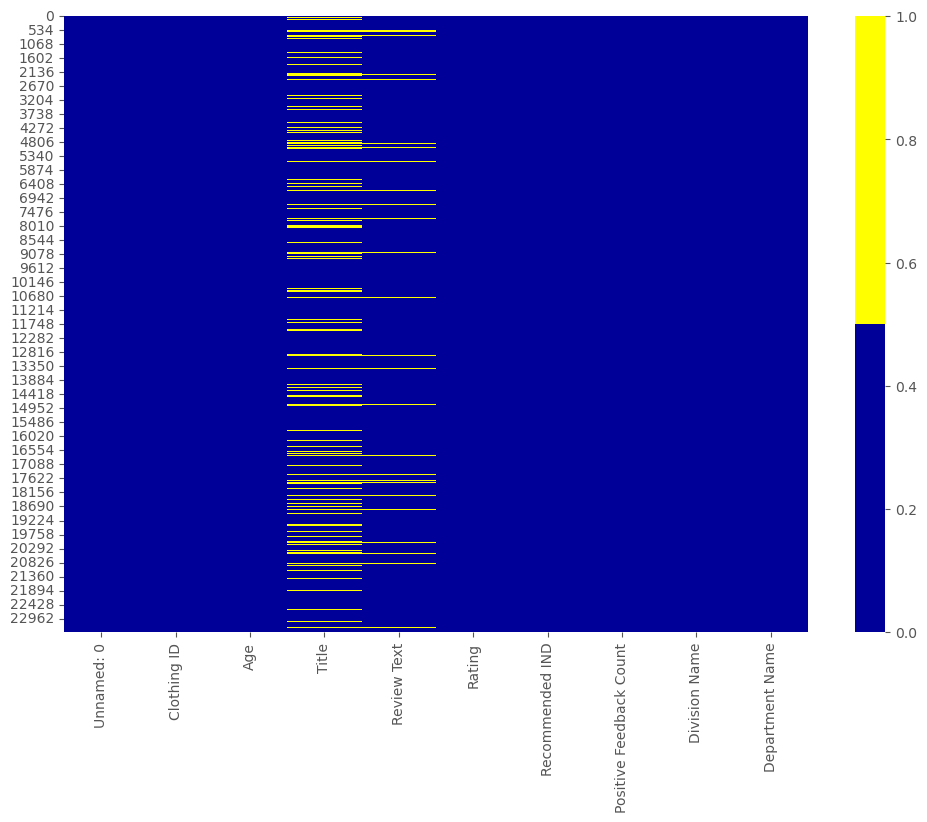

In [7]:
# Plot a heatmap of any missing data
cols = df.columns[:10]
colors = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.

sns.heatmap(df[cols].isnull(),cmap = sns.color_palette(colors))

In [8]:
# Try out a missing data percentage list! 
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%


created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<Axes: xlabel='index'>

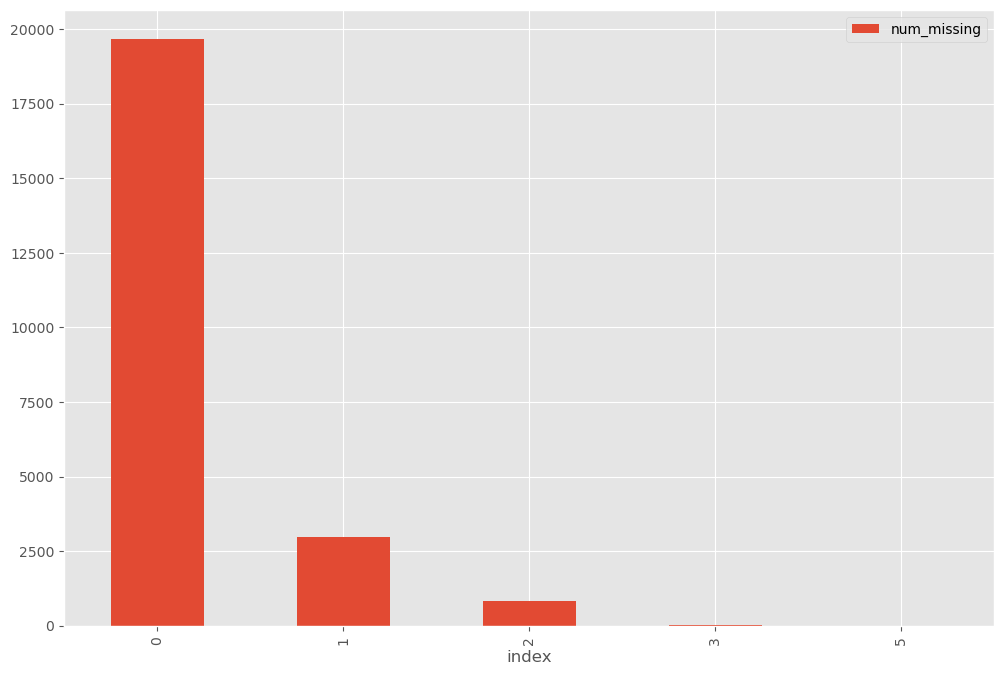

In [9]:
# Plot a missing data histogram
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

There is significant missing data in "Title" and a smaller amount in "Review Text" 

In [10]:
# Handle any missing data in your dataframe.
drop_title = ["Title"]
df_new = df.drop(drop_title, axis =1)
df_new.head()

,Unnamed: 0,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_ismissing,Review Text_ismissing,Division Name_ismissing,Department Name_ismissing,Class Name_ismissing,num_missing
0,0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,True,False,False,False,False,1
1,1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,True,False,False,False,False,1
2,2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,False,False,False,False,False,0
3,3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,False,False,False,False,False,0
4,4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,False,False,False,False,False,0


<Axes: >

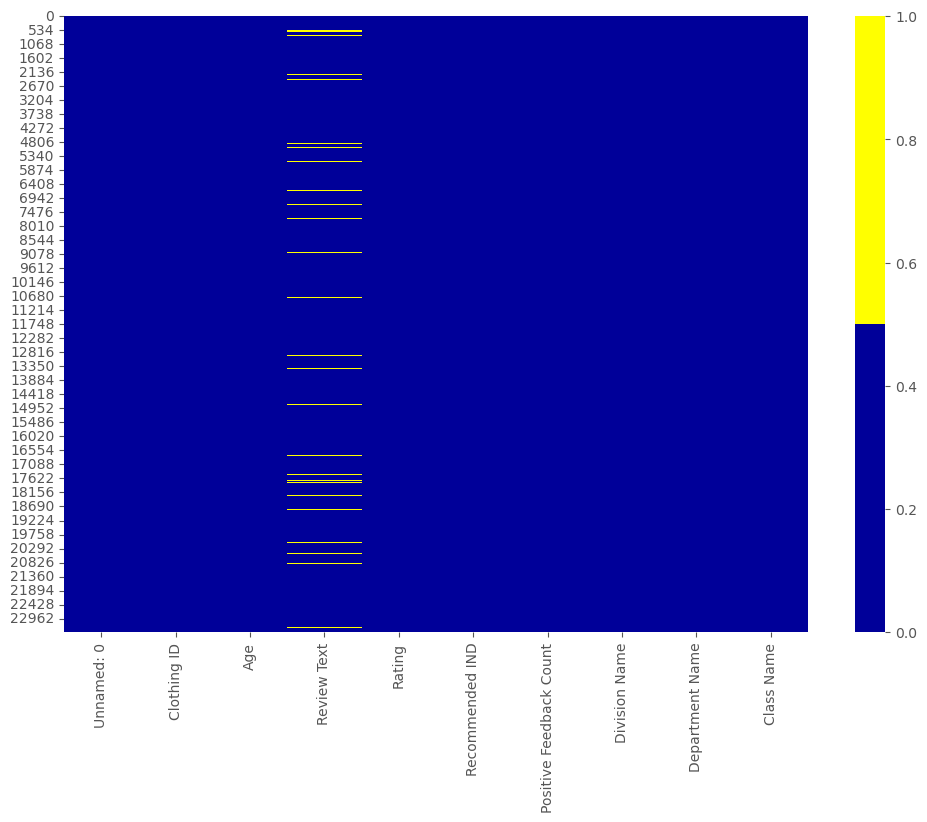

In [11]:
cols = df_new.columns[:10]
colors = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.

sns.heatmap(df_new[cols].isnull(),cmap = sns.color_palette(colors))

In [12]:
df_new.shape

(23486, 16)

In [13]:
# df_new["Review Text"].value_counts()

In [14]:
# # drop rows with a lot of missing values.
# ind_missing = df_new[df_new['num_missing'] > 1].index
# df_less_missing_rows = df_new.drop(ind_missing, axis=0)
# df_less_missing_rows.shape


In [33]:
df= df_new.dropna(subset= ["Review Text", "Division Name", "Department Name", "Class Name"])
df.shape
df

,Unnamed: 0,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_ismissing,Review Text_ismissing,Division Name_ismissing,Department Name_ismissing,Class Name_ismissing,num_missing
0,0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,True,False,False,False,False,1
1,1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,True,False,False,False,False,1
2,2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,False,False,False,False,False,0
3,3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,False,False,False,False,False,0
4,4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,False,False,False,False,False,0
23482,23482,862,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,False,False,False,False,False,0
23483,23483,1104,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,False,False,False,False,False,0
23484,23484,1084,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,False,False,False,False,False,0


<Axes: >

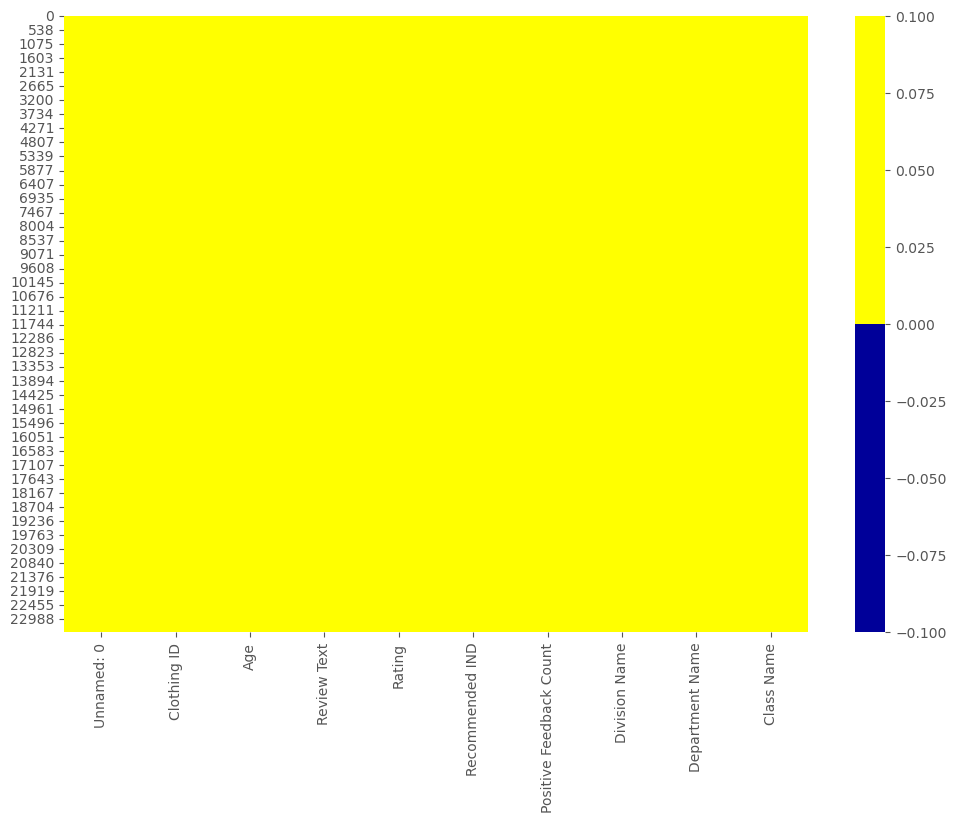

In [32]:
cols = df.columns[:10]
colors = ['#000099', '#ffff00']

sns.heatmap(df[cols].isnull(),cmap = sns.color_palette(colors))

In [17]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Review Text - 0%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%
Title_ismissing - 0%
Review Text_ismissing - 0%
Division Name_ismissing - 0%
Department Name_ismissing - 0%
Class Name_ismissing - 0%
num_missing - 0%


## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<Axes: >

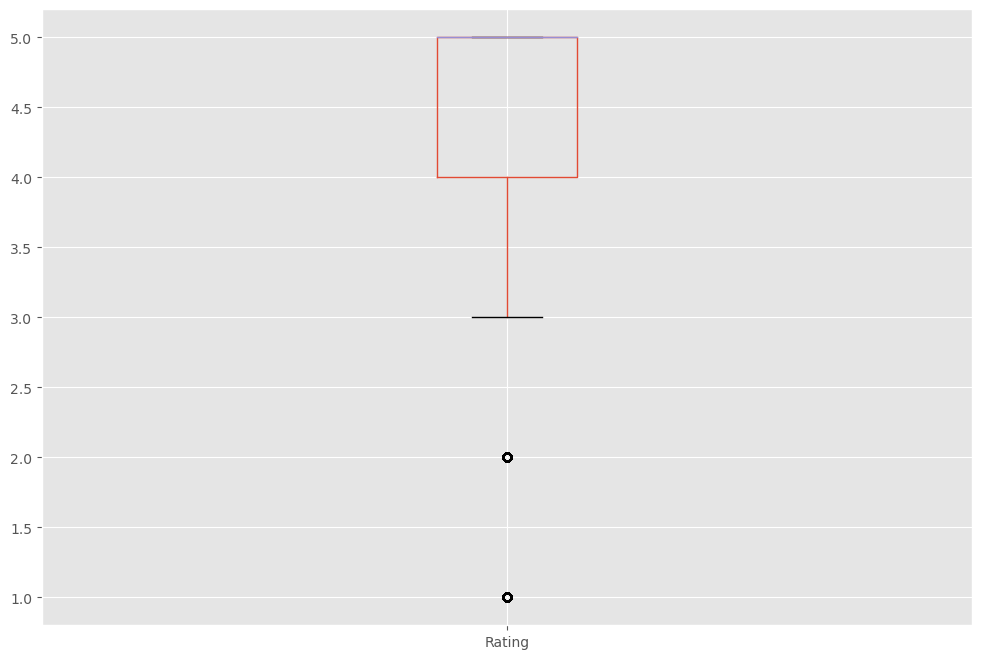

In [18]:
# Plot a histogram to see if there are any outliers.

# box plot.
df.boxplot(column = ["Rating"])

In [19]:
df["Rating"].value_counts()
#even though a rating of 1 looks like an outlier, 
# I dont think it can be considered an outlier 
# with the amound of 1 ratings

5    12540
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

In [20]:
# Use the describe() method
df['Rating'].describe()


count    22641.000000
mean         4.183561
std          1.115762
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

<Axes: >

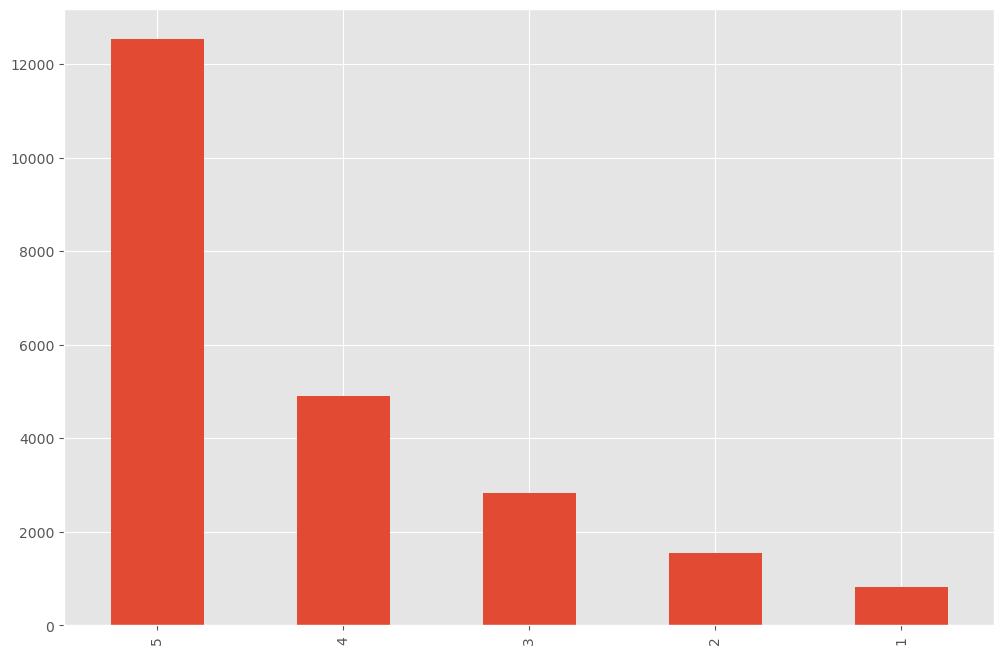

In [21]:
# Plot a bar chart
df['Rating'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [22]:
# Handle any outliers in your dataframe
#I do not concider any of these ratings to be outliers

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [23]:
# Look for any irrelevant data in the dataframe. How will you handle it?
#This shows features with over 95% rows being the same value

num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Review Text_ismissing: 100.00000%
False    22641
Name: Review Text_ismissing, dtype: int64

Division Name_ismissing: 99.94258%
False    22628
True        13
Name: Division Name_ismissing, dtype: int64

Department Name_ismissing: 99.94258%
False    22628
True        13
Name: Department Name_ismissing, dtype: int64

Class Name_ismissing: 99.94258%
False    22628
True        13
Name: Class Name_ismissing, dtype: int64



In [24]:
df_revised = df.drop(columns = ["Review Text_ismissing", "Division Name_ismissing", "Department Name_ismissing", "Class Name_ismissing", "Title_ismissing", "num_missing"], axis = 1)
df_revised.head()

,Unnamed: 0,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [25]:
# Look for duplicates. How will you handle any duplicates?
# we know that column 'id'/"Unnamed: 0" is unique,but what if we drop it?
df_dedupped = df_revised.drop('Unnamed: 0', axis=1).drop_duplicates()

# there were duplicate rows
print(df_revised.shape)
print(df_dedupped.shape)
df = df_dedupped

(22641, 10)
(22640, 9)


In [26]:
df.head(2)

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [27]:
# Think about what data in the dataframe may be uninformative. 
# Make note here of what situations may render data uninformative 
# and how you would handle it?
# division name, department name, and class name are all very similar...
# do we need them all?


In [28]:
df['Recommended IND'] = df['Recommended IND'].replace({1:'Yes', 0:'No'})

In [29]:
df.head(5)

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,Yes,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,Yes,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,No,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,Yes,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,Yes,6,General,Tops,Blouses


## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [30]:
# Try to convert all the strings in a column to lower or upper case. 
df["Review Text"]= df["Review Text"].str.lower()
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,absolutely wonderful - silky and sexy and comf...,4,Yes,0,Initmates,Intimate,Intimates
1,1080,34,love this dress! it's sooo pretty. i happene...,5,Yes,4,General,Dresses,Dresses
2,1077,60,i had such high hopes for this dress and reall...,3,No,0,General,Dresses,Dresses
3,1049,50,"i love, love, love this jumpsuit. it's fun, fl...",5,Yes,0,General Petite,Bottoms,Pants
4,847,47,this shirt is very flattering to all due to th...,5,Yes,6,General,Tops,Blouses
